## Case Study for Lead Scoring 

## The Company X Education is in the business of online learning. It has a team of sales folks who follow up with potential students to get registered for the course. There are various steps which these teams follow and what ever the status of the potential student is, they keep it updated in their Database.

## These potential students now marked as Leads can opt for registering or not registering for the course. 

## The problem that is at hand is that though the Sales teams is working very hard, their conversion rate i.e. actually registering a Lead is approx 30% only.

## The CEO is looking for a solution and suggestions so that they can increase their accuracy upto 80%.

## Also they would like to identify the Hot Leads and other factors about these leads so that they can build strategies at different points in time.


In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import seaborn as sns


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from sklearn import metrics

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [174]:
#Setting the Path for reading the files

#Reading Dataset
Lead_df = pd.read_csv(r"C:\Rochit\Upgrad\ML-1\Assignments\Lead_Scoring_Case study-Nov-18\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [175]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
2,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
3,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
4,3f04fd93-2884-45f6-a4fc-f3b6f234554b,660153,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified


## Data Preparation

In [176]:
print(Lead_df.shape)
Lead_df.info()

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                             

In [177]:
#Checking for Duplicate entries of countries in the Dataset
if sum(Lead_df.duplicated(subset = "Prospect ID")) == 0 :
    print("No Duplicates Found")

No Duplicates Found


In [178]:
#Checking for Duplicate entries of countries in the Dataset
if sum(Lead_df.duplicated(subset = "Lead Number")) == 0 :
    print("No Duplicates Found")

No Duplicates Found


In [179]:
# replacing the columns with select as a level to nan
Lead_df[['Specialization','How did you hear about X Education','Lead Profile','City']]= Lead_df[['Specialization','How did you hear about X Education','Lead Profile','City']].replace('Select', np.NaN)

#### We notice that some of the fields have the value Select - Select is a s good as having NULL, so need to treat it the same. So going replace all Select Values with NULL and handle the same. 

In [180]:
# Checking Data which is missing or is Select
#Select_var = ['City','Lead Profile','How did you hear about X Education','Specialization']

Lead_df_Missing= ((Lead_df[Lead_df.columns].isnull())).mean()*100 
Missing_Col_list = list(Lead_df_Missing.index[Lead_df_Missing >0])

print(Lead_df_Missing)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

####  We Observe we have a lot of missing Data in this DataSet 

In [181]:
# DRopping Columns with more than 15% NULL Values
'''
Checking columns which have NULL Values
Dropping columns which have more than 15% NULL Values for both files
'''
#Removing column which has all null values from application_data the files
Lead_df = Lead_df.drop(Lead_df.columns[100*(Lead_df.isnull().sum()/len(Lead_df.index)) > 15], axis=1)

Lead_df_Missing= ((Lead_df[Lead_df.columns].isnull())).mean()*100 


In [182]:

#Checking if there are any left
Lead_df_Missing=Lead_df.isna().mean()*100
Lead_df_Missing.sort_values(ascending=False,inplace=True)
print (Lead_df_Missing)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Last Notable Activity                       0.000000
A free copy of Mastering The Interview      0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
Total Time Spent on Website                 0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

### We now have only a few columns left with missing Data. We will now start handling this and take case by casr to evaluate how missing values for the columns are to be handled.


In [183]:
# Picking the names of the columns which still have missing Data:

Missing_Col_list = list(Lead_df_Missing.index[Lead_df_Missing >0])
print("Only {} Columns with missing Data have been identified and the names of these columns are as below : - ".format(len(Missing_Col_list)))
for val in Missing_Col_list:
    print(val)
    

Only 4 Columns with missing Data have been identified and the names of these columns are as below : - 
TotalVisits
Page Views Per Visit
Last Activity
Lead Source


In [184]:
#Some of the variables are continuous variables. After evaluation we realize that we can use the mean value of the variable. 
#there is no actual relation of the conversion status and value of the column (understanding based on current data) 
Cont_Var = ['TotalVisits','Page Views Per Visit']

for val in Cont_Var:
    mean_val = round(Lead_df[val].mean(),2)
    Lead_df[val].fillna(int(mean_val),inplace=True)


In [185]:
Lead_df.loc[Lead_df['Lead Source']=='google', 'Lead Source'] = 'Google'
print(Lead_df['Lead Source'].unique())

['Olark Chat' 'Reference' 'Welingak Website' 'Google' 'Facebook' nan
 'Live Chat' 'Click2call' 'Organic Search' 'Direct Traffic'
 'Referral Sites' 'bing' 'Pay per Click Ads' 'Social Media' 'testone'
 'Press_Release' 'welearnblog_Home' 'youtubechannel' 'blog' 'NC_EDM'
 'WeLearn']


#### For the categorical variables, since the number of values to be replaced is not very high, and is unlikely to influence the result, we will use mode to pick the most common value and put that in the columns

In [186]:
#Filling the blank values of the NA Variables
# ['Last Activity','Lead Source']
# Picking the most popular values using mode
Lead_Source_Mode = Lead_df['Lead Source'].mode()[0]
print(Lead_Source_Mode)
Lead_Activity_Mode =Lead_df['Last Activity'].mode()[0]
print(Lead_Activity_Mode)
Lead_df['Lead Source'].fillna(Lead_Source_Mode,inplace=True)
Lead_df['Last Activity'].fillna(Lead_Activity_Mode,inplace=True)


Google
Email Opened


In [187]:

#Checking if there are any left
Lead_df_Missing=Lead_df.isna().mean()*100
Lead_df_Missing.sort_values(ascending=False,inplace=True)
print (Lead_df_Missing)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [188]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Search                                      9240 non-null object
Magazine                                    9240 non-null object
Newspaper Article                           9240 

In [189]:
print(Lead_df.shape)
# Dropping the variables variables whichare constant and have single value 
#Const_Val = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Lead Origin_Quick Add Form','Lead Source_blog','Lead Source_youtubechannel','Last Activity_Email Received','Last Notable Activity_Email Received']
Const_Val = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

#DRopping constant columns
Lead_df.drop(columns=Const_Val,inplace=True)

print(Lead_df.shape)


(9240, 24)
(9240, 19)


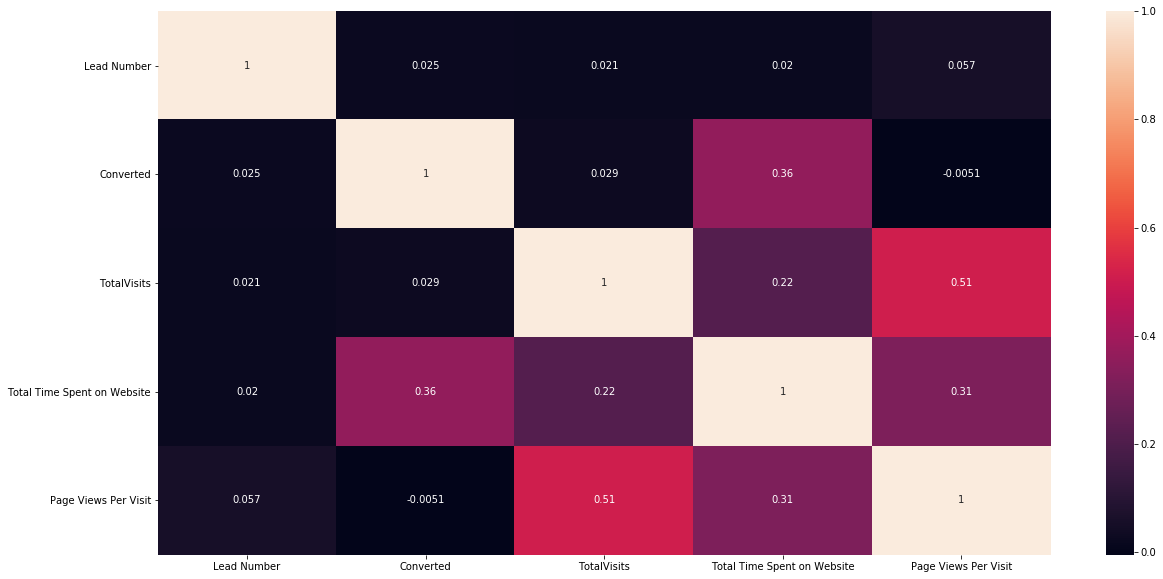

In [190]:
#HEatmap to show the correlation between th enumeric Values
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_df.corr(),annot = True)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


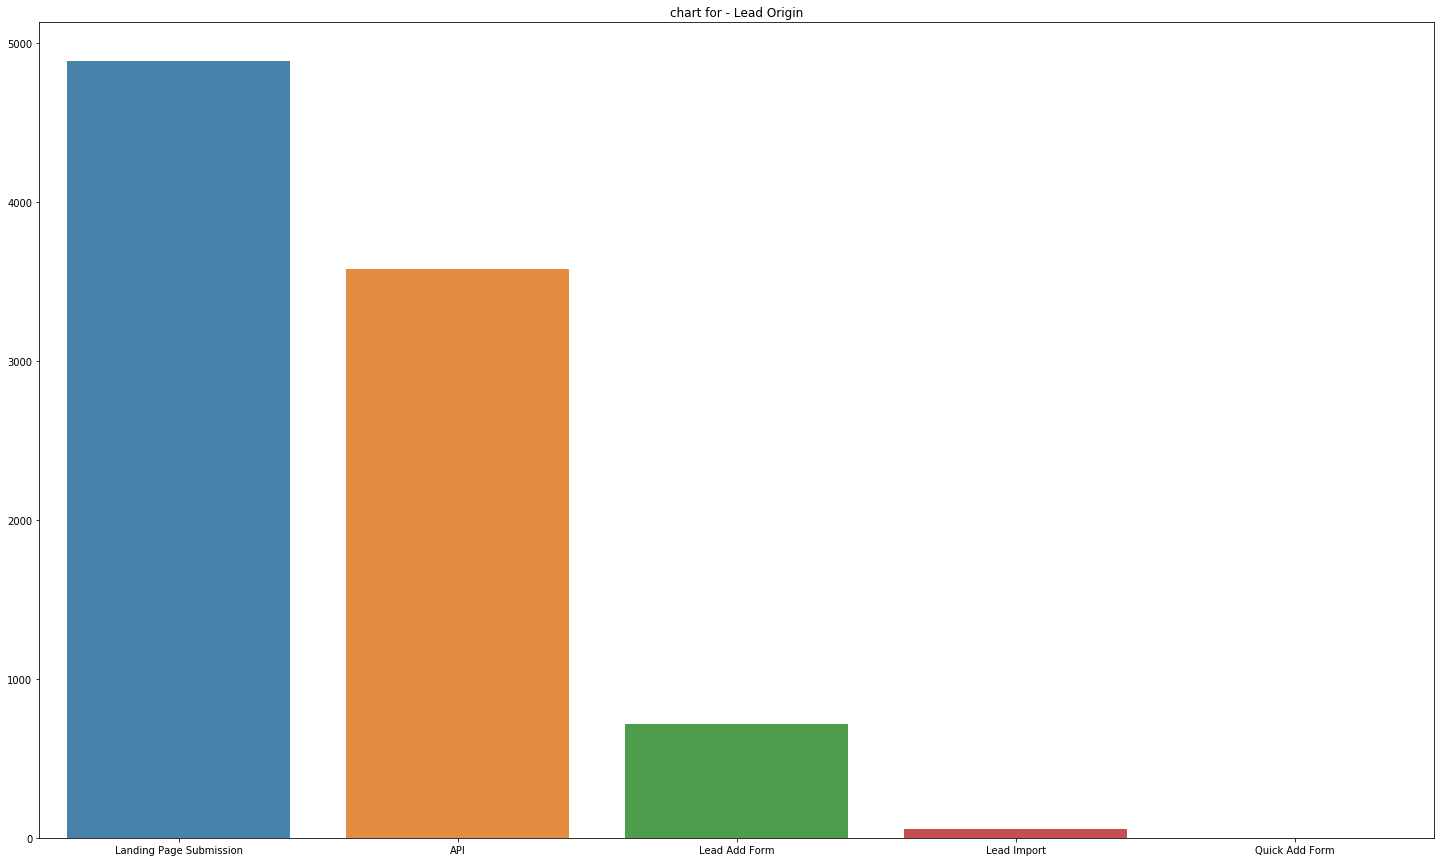

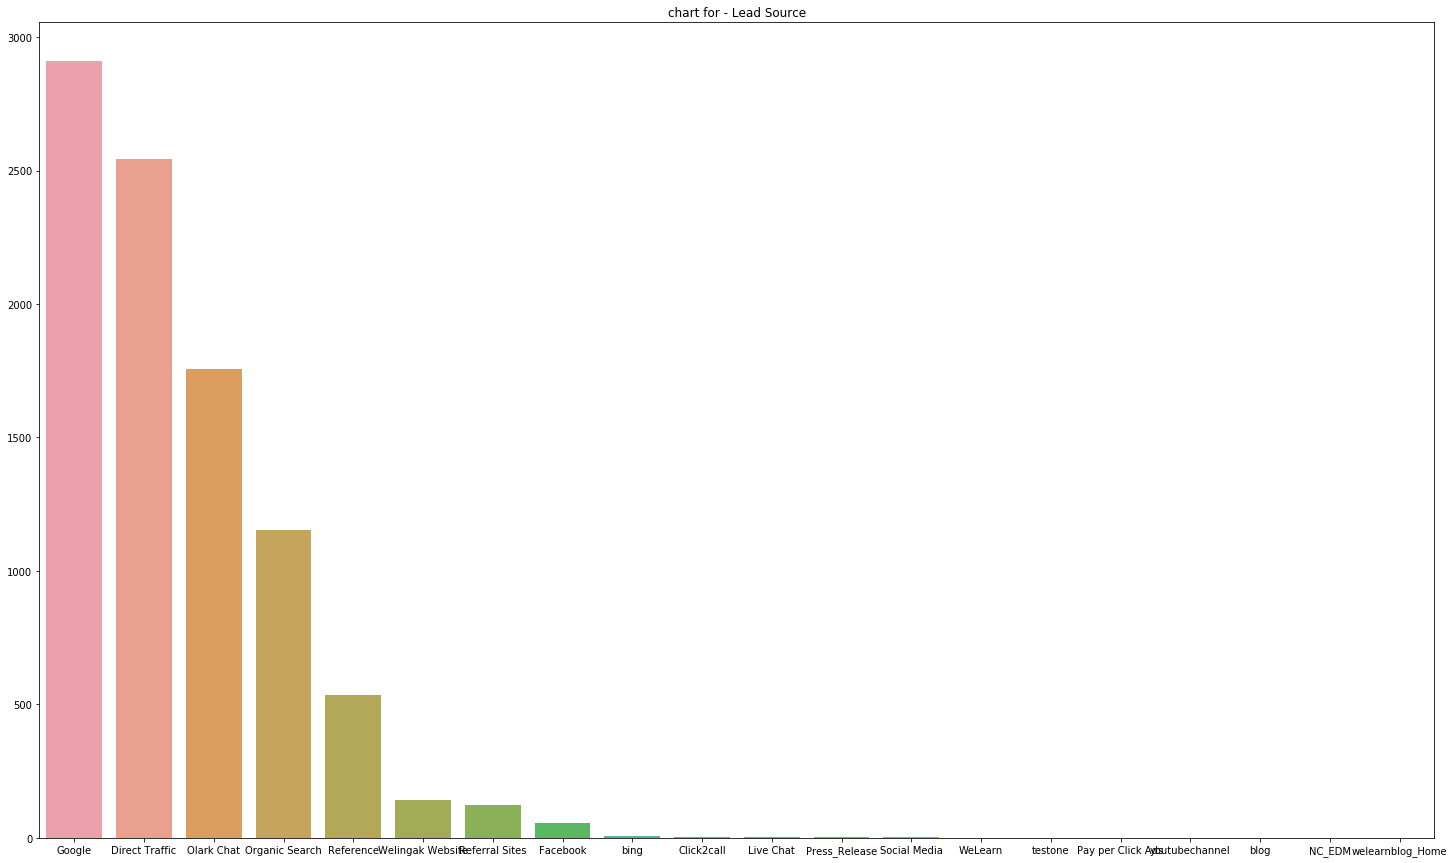

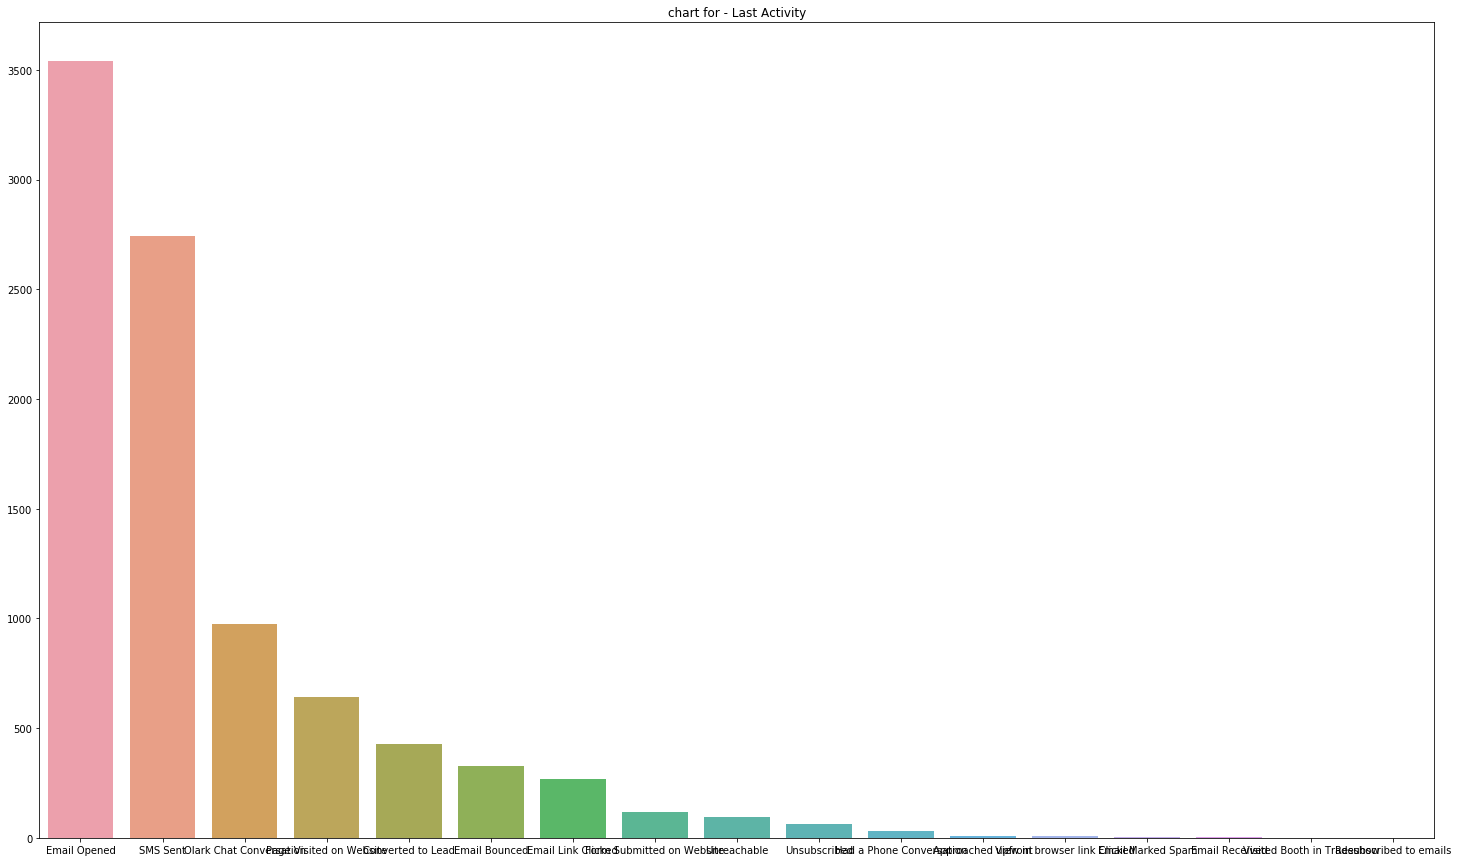

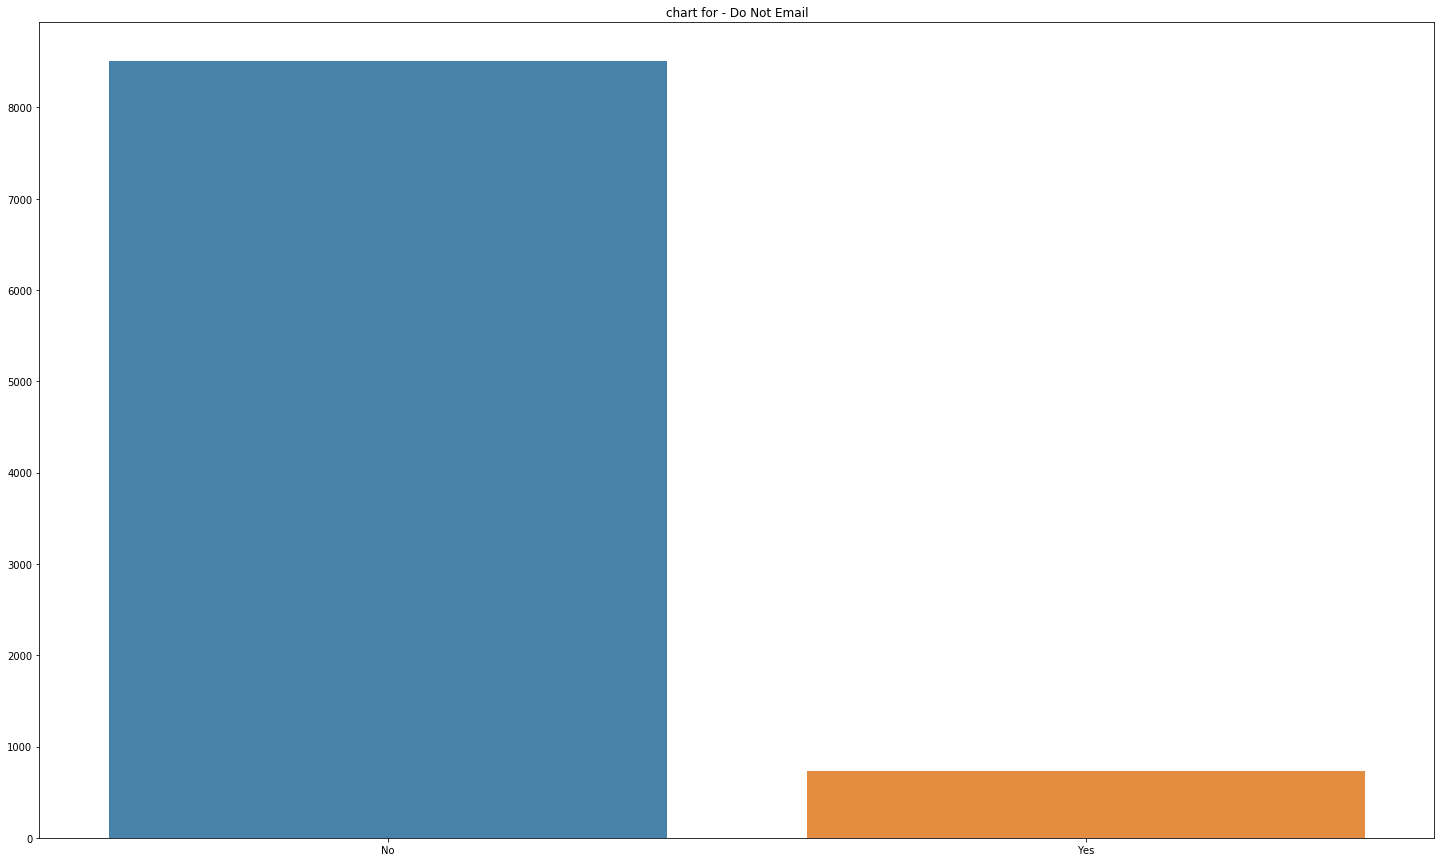

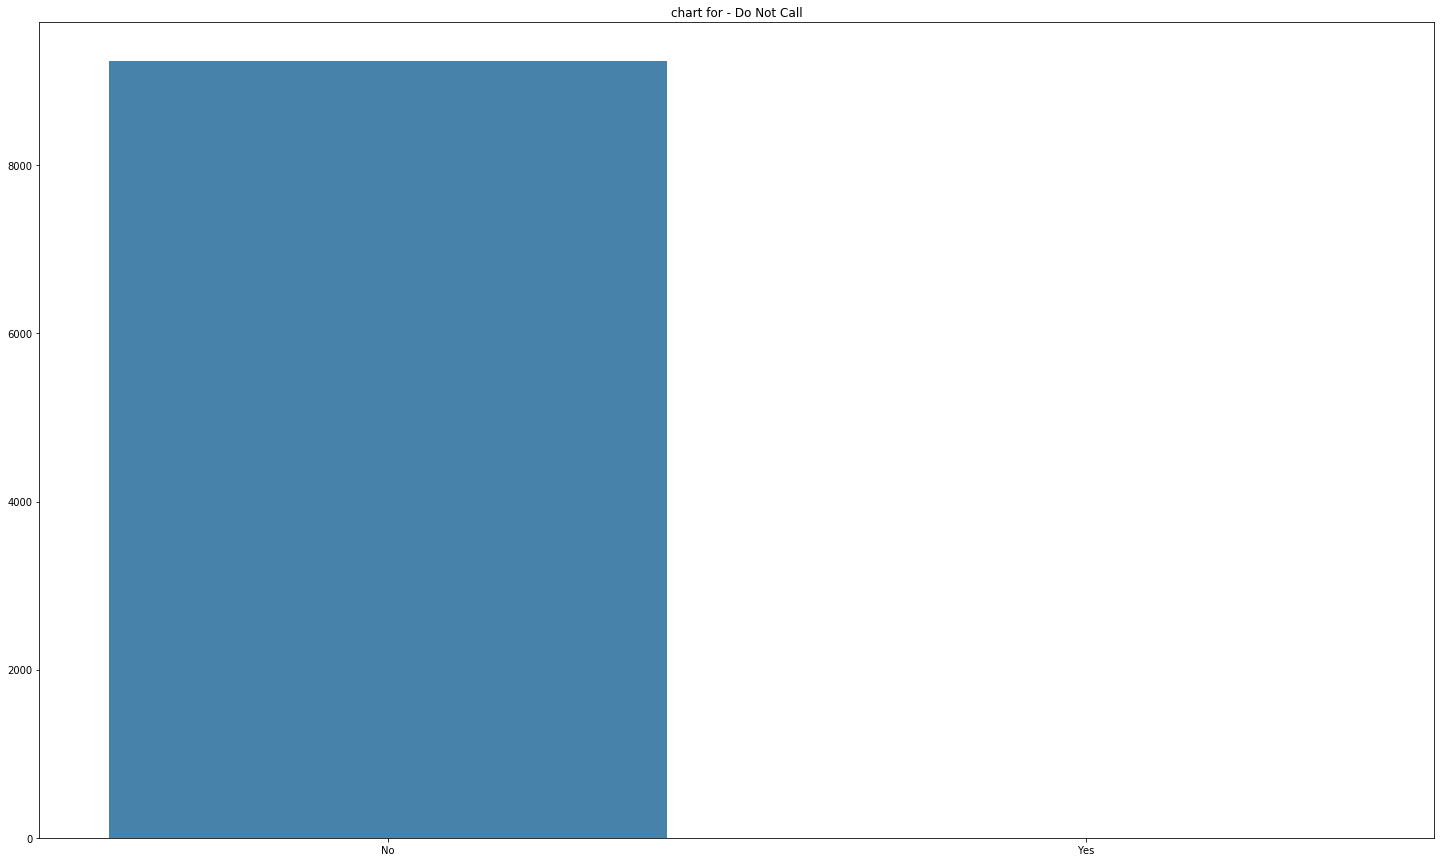

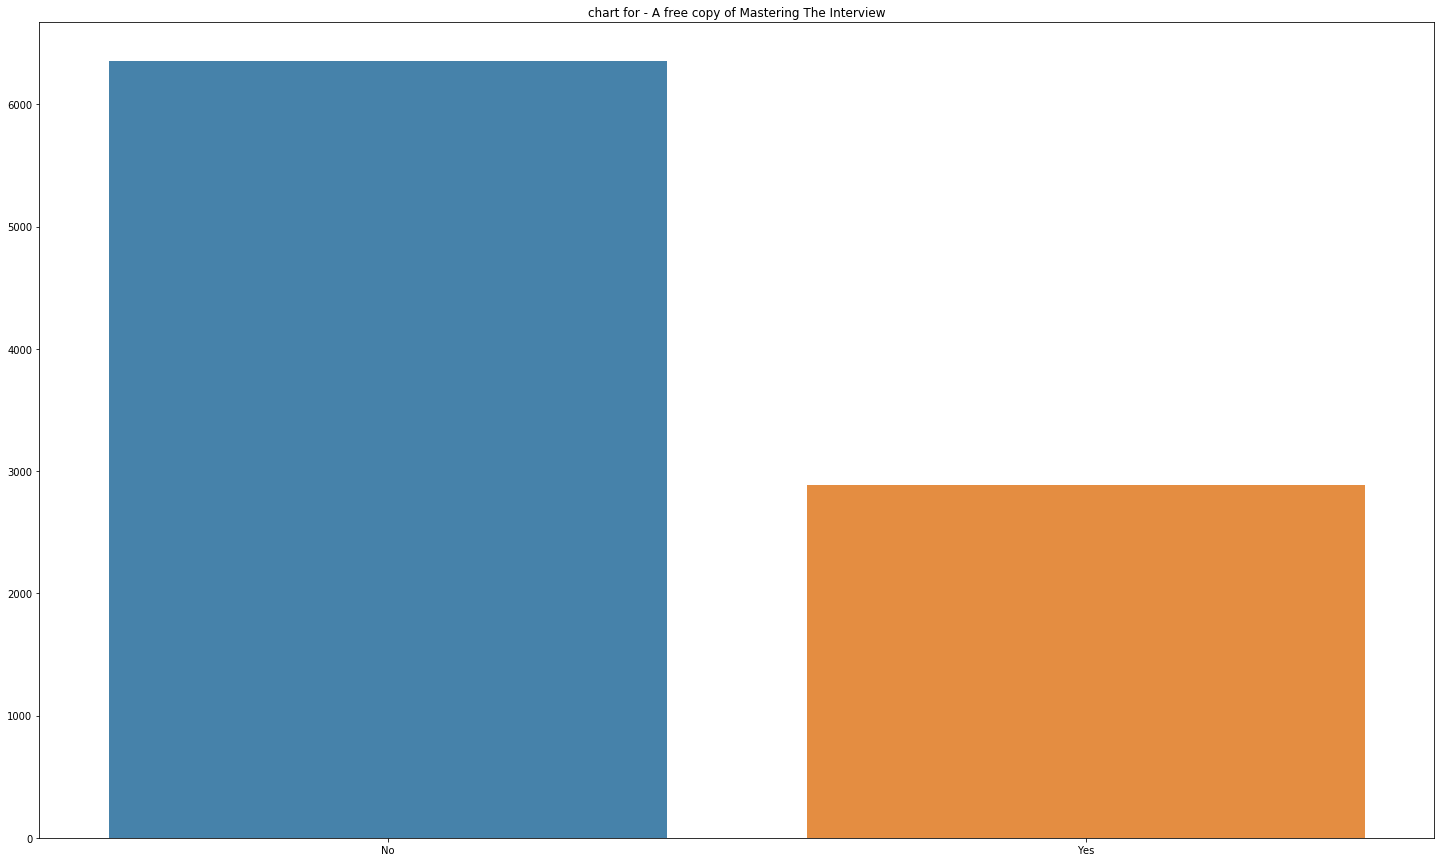

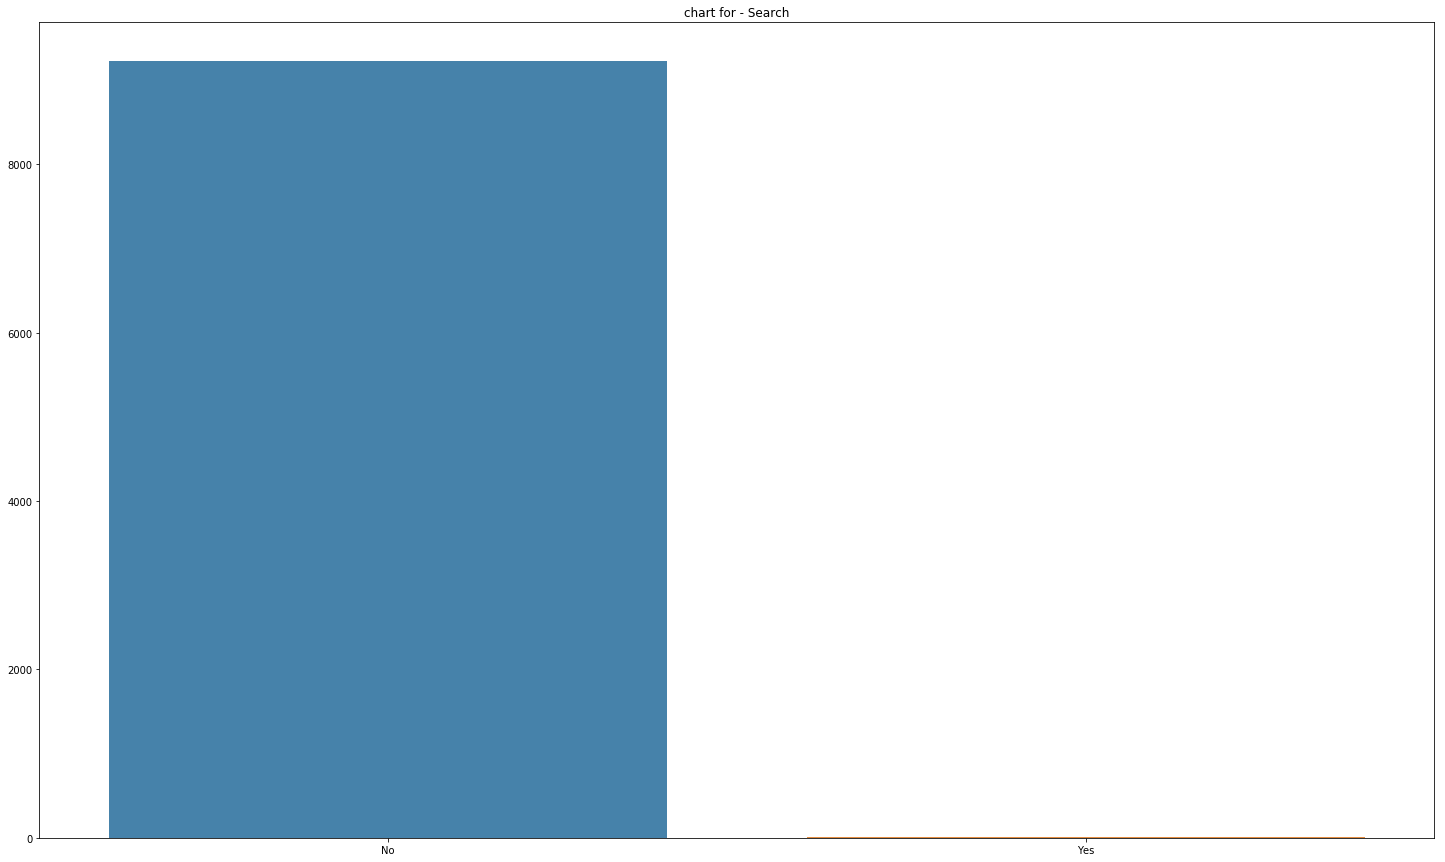

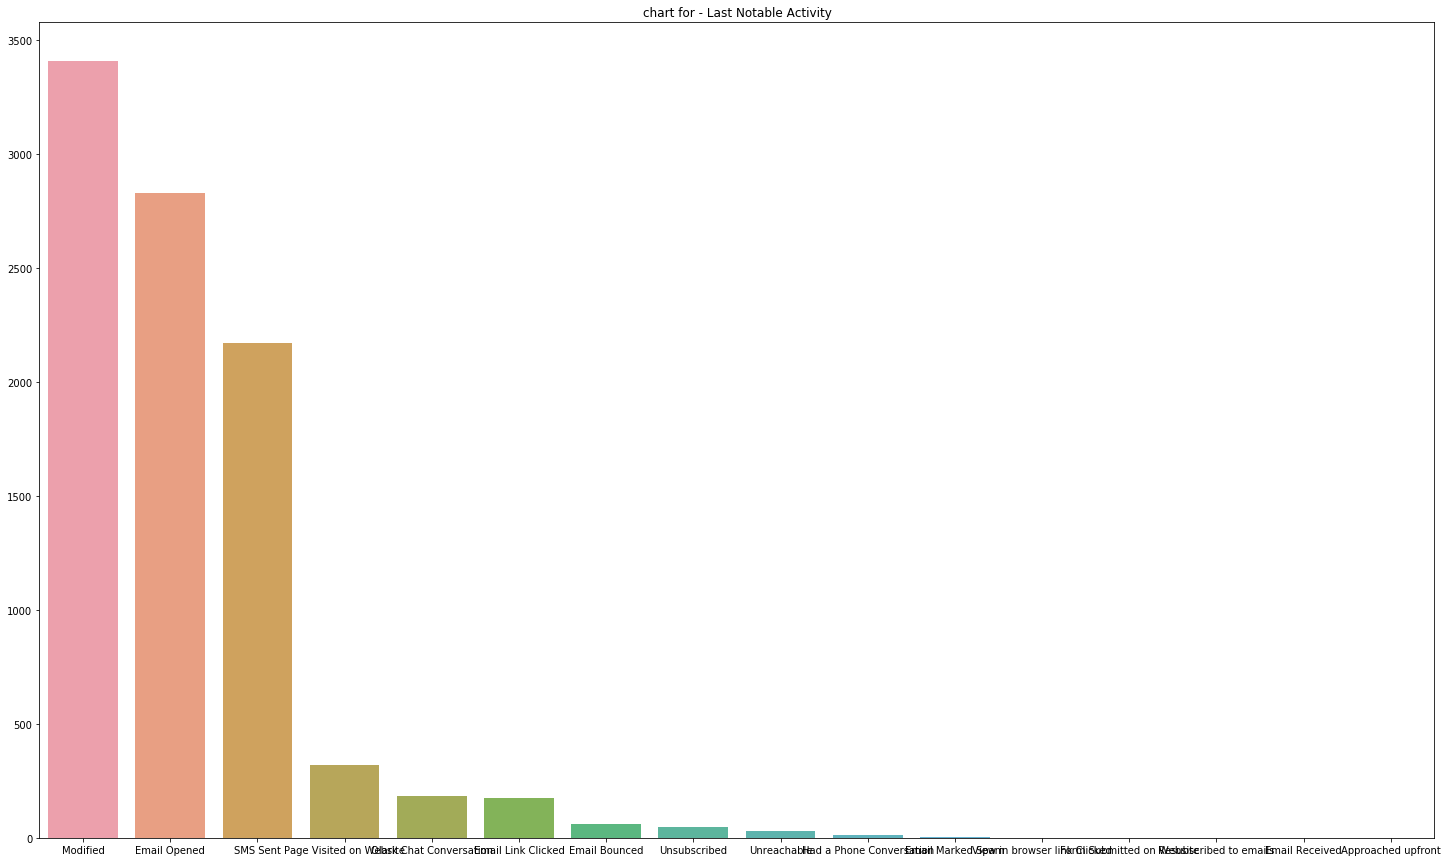

In [199]:
print(Lead_df.columns)
Categorical_List = ['Lead Origin','Lead Source','Last Activity','Do Not Email','Do Not Call',
                    'A free copy of Mastering The Interview','Search',
                   'Last Notable Activity'] 

#Creating Charts
for col in Categorical_List:
    f = plt.figure(figsize=(25, 15))
    if col !='price':
        count = Lead_df[col].value_counts()
        sns.barplot(count.index, count.values, alpha=0.9)
        plt.title('chart for - '+col)
        plt.show()
        


#### Converting Yes and No to integer values


In [18]:
# Converting Yes to 1 and No to 0 for some of the variables

Lead_df['Do Not Email'] = Lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})
Lead_df['Do Not Call'] = Lead_df['Do Not Call'].map({'Yes': 1, 'No': 0})
Lead_df['Search'] = Lead_df['Search'].map({'Yes': 1, 'No': 0})
Lead_df['Newspaper Article'] = Lead_df['Newspaper Article'].map({'Yes': 1, 'No': 0})
Lead_df['X Education Forums'] = Lead_df['X Education Forums'].map({'Yes': 1, 'No': 0})
Lead_df['Newspaper'] = Lead_df['Newspaper'].map({'Yes': 1, 'No': 0})
Lead_df['Digital Advertisement'] = Lead_df['Digital Advertisement'].map({'Yes': 1, 'No': 0})

Lead_df['Through Recommendations'] = Lead_df['Through Recommendations'].map({'Yes': 1, 'No': 0})
Lead_df['A free copy of Mastering The Interview'] = Lead_df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})


#### Creating Dummy variables

In [21]:
# Creating a dummy variable for the variable 'Lead Origin' , decided not to drop the first one as the content of the 
# variable is kind of unrelated and there is no logic for the combinations as to if a value is 0 or 1. 

cont = pd.get_dummies(Lead_df['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
Lead_df = pd.concat([Lead_df,cont],axis=1)

# Creating a dummy variable for the variable 'Lead Source' 
pm = pd.get_dummies(Lead_df['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
Lead_df = pd.concat([Lead_df,pm],axis=1)

# Creating a dummy variable for the variable 'Last Activity' 
pm = pd.get_dummies(Lead_df['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
Lead_df = pd.concat([Lead_df,pm],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' 
pm = pd.get_dummies(Lead_df['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
Lead_df = pd.concat([Lead_df,pm],axis=1)


In [22]:
#Dropping the extra variables which were created through dummy variables or some of the other variables which have negligible variance
Lead_df.drop(['Do Not Call','Do Not Email','Search','Newspaper','Digital Advertisement','Through Recommendations','Last Notable Activity','Last Activity','Lead Origin','Lead Source'],1,inplace=True)

In [23]:
#Checking Data Types
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 63 columns):
Prospect ID                                           9240 non-null object
Lead Number                                           9240 non-null int64
Converted                                             9240 non-null int64
TotalVisits                                           9240 non-null float64
Total Time Spent on Website                           9240 non-null int64
Page Views Per Visit                                  9240 non-null float64
Newspaper Article                                     9240 non-null int64
X Education Forums                                    9240 non-null int64
A free copy of Mastering The Interview                9240 non-null int64
Lead Origin_Landing Page Submission                   9240 non-null uint8
Lead Origin_Lead Add Form                             9240 non-null uint8
Lead Origin_Lead Import                               9240 non-null uint8


In [24]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper Article,X Education Forums,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440,0.000216,0.000108,0.312554,0.528788,0.077706,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,23405.995698,0.486714,4.819024,548.021466,2.145781,0.014711,0.010403,0.463559,0.499198,0.267722,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for outliers for the variables which have not been converted to 0-1 range

In [25]:
# Checking for outliers in the continuous variables

num_Lead_df = Lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [26]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_Lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [27]:
Lead_df.shape

(9240, 63)

### We observe that there are outliers and need to be handled. We can also confirm this from the boxplot

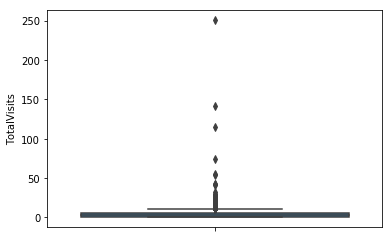

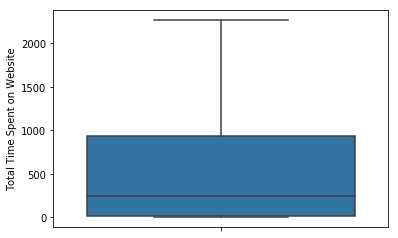

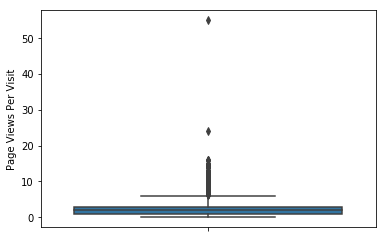

In [28]:
#FRom the Boxplots we observe that there are outliers in all these
for var in num_Lead_df.columns:
    sns.boxplot(y=var, data=num_Lead_df)
    plt.show()

In [29]:
var_outlier = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# removing (statistical) outliers
#REmoving the Outliers for variable TotalVisits

Q1 = Lead_df.TotalVisits.quantile(0.05)
Q3 = Lead_df.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
Lead_df = Lead_df[(Lead_df.TotalVisits >= Q1 - 1.5*IQR) & (Lead_df.TotalVisits <= Q3 + 1.5*IQR)]

#REmoving the Outliers for variable Total Time Spent on Website

Q1 = Lead_df['Total Time Spent on Website'].quantile(0.05)
Q3 = Lead_df['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
Lead_df = Lead_df[(Lead_df['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (Lead_df['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

#REmoving the Outliers for variable Page Views Per Visit

Q1 = Lead_df['Page Views Per Visit'].quantile(0.05)
Q3 = Lead_df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
Lead_df = Lead_df[(Lead_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (Lead_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]



In [30]:
num_Lead_df = Lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]


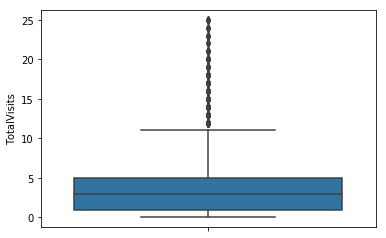

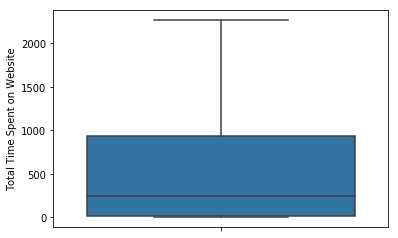

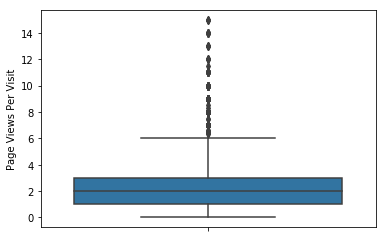

In [31]:
#FRom the Boxplots we observe that there are outliers in all these
for var in num_Lead_df.columns:
    sns.boxplot(y=var, data=num_Lead_df)
    plt.show()

In [32]:
print(Lead_df.shape)
#variables which single  values - 
Const_Val = ['Lead Origin_Quick Add Form','Lead Source_blog','Lead Source_youtubechannel','Last Activity_Email Received']

#DRopping constant columns
Lead_df.drop(columns=Const_Val,inplace=True)

print(Lead_df.shape)


(9214, 63)
(9214, 59)


In [33]:
Lead_df.shape

(9214, 59)

### We have gone through the step of Data cleaning considering all the things. We followed the below steps for the same:
1. Firstly we took care of the EDA Part wihch also included the Data Cleaning part. We saw that there were missing values and also that some of the columms has Select as an option. Select potentially means missing value so had to be treated like a missing value.
2. we we replaced all Selects with Nan values so that it could be part of the total calculation. we had considered using or in the ondition - but this just seemed easier.
3. calculated the %age of missing values. anything more than 15% was dropped off. Industry trend and analysis shows that if more than 15% of data is missing then the result we might get will be skewed and better to not include such kind of variables in the model. There will be other variables which will be explaining the model.
4. After dropping the null value variables. we were still left with very few variables which had missing values. For the numeric variables we calculated the mean value and filled that in.
5. for the categorical variables - calculated the mode and filled that in.
6. After the cleaning of the Data, checked for the outliers and did the outlier treatment. Checked the percentiles and any data below 5th and above 95th were removed - this was so that these values do not impact the overall solution
7. We observed that there were some variables which had a single value - the variance for these variables would be nil and would not be contributing at all to the model - such variables too were dropped.
8. All variables which had yes/no values were converted to 1/0 values - a simple replacement.
9. We then created dummy variables and dropped the first one for reducing the no of variables and better handling.
10. Once the Data was ready for modelling we moved ahead with the modeling part


### Before we move onto Model Building - would like to re-iterate the problem at hand in probabilistic modelling terminology.

## We have been assigned with the job of increasing the connversion rate of the Leads to actual registered users.

## The CEO is not looking for just a high count of conversions but is also looking for a more focused approach for his Sales team. This means that making suggestions so that the Sales team is able to convert most of the Leads they get onto and do not have to waste time on the Leads which will not get converted.

## So if we think of it again, what we need to focus on is that correctly identify the Leads which will not get converted. This will reduce the effort put in the calls where there will be no result. Hence the team will focus on more probable leads, leading to a higher convesion rate.



#### Splitting into Train and Test

In [34]:
from sklearn.model_selection import train_test_split
Lead_df.index=Lead_df['Lead Number']
# Putting feature variable to X
X = Lead_df.drop(['Converted','Prospect ID','Lead Number'],axis=1)

# Putting response variable to y
y = Lead_df['Converted']


In [35]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [36]:
y_train.shape

(6449,)

### Standardizing The Data

In [37]:
var_toStandardize = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[var_toStandardize] = scaler.fit_transform(X_train[var_toStandardize])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper Article,X Education Forums,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
580457,-1.031031,-0.890604,-1.158117,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
632611,-0.407023,-0.762414,-0.169668,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
612731,-0.407023,2.396563,-0.169668,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
584456,1.777005,1.409497,3.289904,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
581789,-0.407023,1.374703,-0.169668,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [39]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper Article,X Education Forums,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6.449000e+03,6.449000e+03,6.449000e+03,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,...,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000
mean,4.169577e-17,2.574869e-16,2.457632e-16,0.000310,0.000155,0.310901,0.528609,0.075205,0.006358,0.274926,...,0.000155,0.001241,0.364553,0.019228,0.033649,0.000155,0.237401,0.003411,0.004342,0.000155
std,1.000078e+00,1.000078e+00,1.000078e+00,0.017609,0.012452,0.462898,0.499220,0.263743,0.079487,0.446512,...,0.012452,0.035202,0.481342,0.137335,0.180337,0.012452,0.425523,0.058312,0.065754,0.012452
min,-1.031031e+00,-8.906039e-01,-1.158117e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.190268e-01,-8.686284e-01,-6.638925e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.501875e-02,-4.364438e-01,-1.696679e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.289893e-01,8.179903e-01,3.245566e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.769070e+00,3.270089e+00,6.255251e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Checking the Standardized Data

num_Lead_df = Lead_df[['TotalVisits','Page Views Per Visit']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_Lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Page Views Per Visit
count,9214.000000,9214.000000
mean,3.312568,2.338099
std,3.267678,2.037071
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,9.000000,6.000000
99%,16.000000,9.000000


In [41]:
#Checking the current Conversion Rate - that is what Percentage of leads are marked as converted. 
conversion_rate = (sum(Lead_df['Converted'])/len(Lead_df['Converted'].index))*100
conversion_rate

38.571738658563056

### Checking the Correlation of the variables

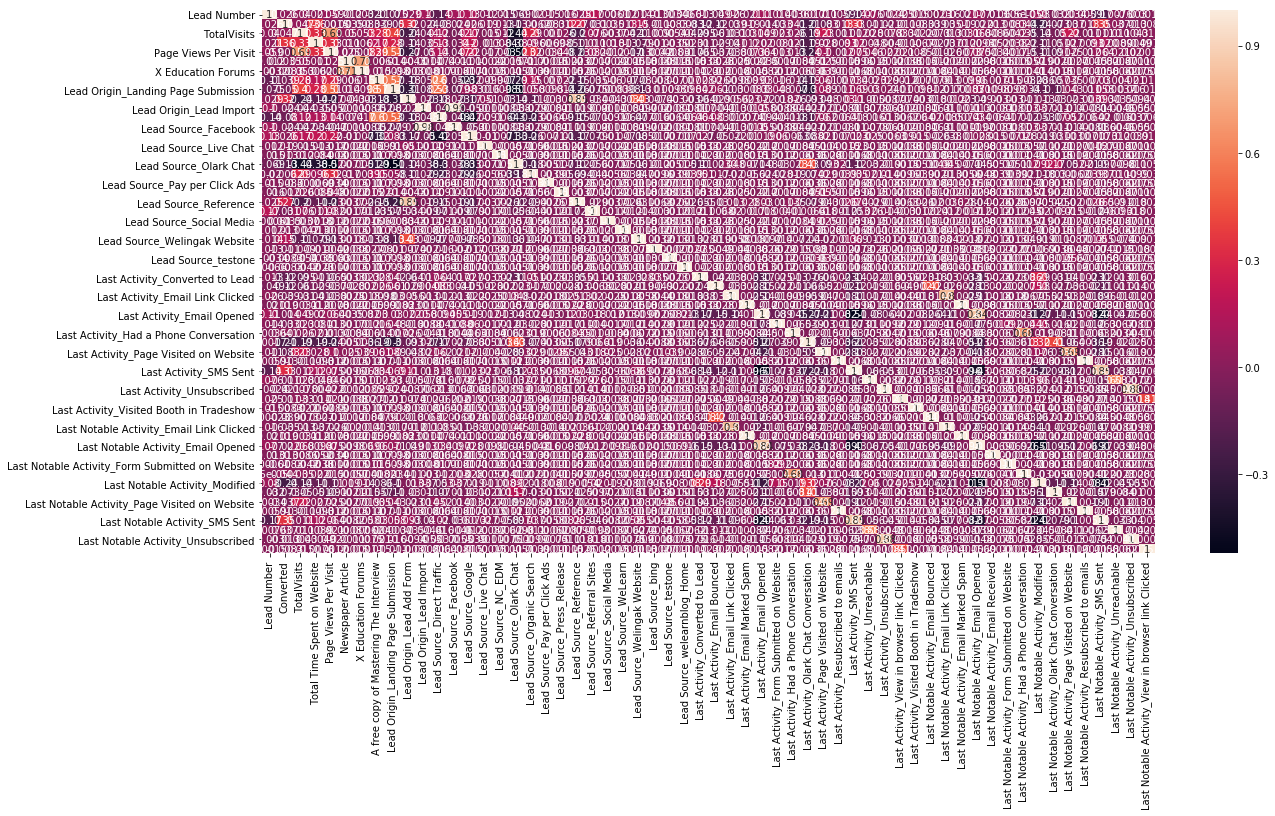

In [42]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_df.corr(),annot = True)

### As we see, we currently have too many variables. We need to reduce the number of variables firstly to be able to move forward - we will be doing this while Modelling

In [43]:
Lead_df.shape

(9214, 59)

## Using RFE Method

### Model Building

### # Logistic regression model - we are using the Generalized Linear Model libraries for this and here we are going to use Binomialwhich basically means that we will have two options a 0 or a 1 - based on this we will do our analysis


In [44]:
import statsmodels.api as sm
# Logistic regression model - we are using the Generalized Linear Model libraries for this and here we are going
#to use Binomialwhich basically means that we will have two options a 0 or a 1 - based on this we will do our analysis
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.4
Date:                Mon, 18 Nov 2019   Deviance:                       5680.8
Time:                        17:26:52   Pearson chi2:                 6.64e+03
No. Iterations:                    31   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 30.5148   6.34e+06   4.81e-06      1.000   -1.24e+07    1.24e+07
TotalVisits                                            0.2296      0.048      4.775      0.000       0.135       0.324
Total Time Spent on Website                            1.1411      0.039     29.163      0.000       1.064       1.218
Page Views Per Visit                                  -0.2049      0.053     -3.895      0.000      -0.308      -0.102
Newspaper Article                                     23.2233   5.09e+04      0.000      1.000   -9.97e+04    9.97e+04
X Education Forums                                   -60.1254   6.71e+07  -8.96e-07      1.000   -1.32e+08    1.32e+08
A free copy of Mastering The Interview                 0.0095      0.102      0.094      0.925      -0.190       0.209
Lead Origin_Landing Page Submission                   -0.0766      0.102     -0.753      0.452      -0.276       0.123
Lead Origin_Lead Add Form                              2.5209      0.554      4.546      0.000       1.434       3.608
Lead Origin_Lead Import                              -18.5692   1.64e+04     -0.001      0.999   -3.21e+04     3.2e+04
Lead Source_Direct Traffic                            -0.2092      1.387     -0.151      0.880      -2.928       2.509
Lead Source_Facebook                                  18.7875   1.64e+04      0.001      0.999    -3.2e+04    3.21e+04
Lead Source_Google                                     0.2191      1.383      0.158      0.874      -2.491       2.929
Lead Source_Live Chat                                 30.6232   6.74e+06   4.54e-06      1.000   -1.32e+07    1.32e+07
Lead Source_NC_EDM                                    30.0437   2.17e+06   1.38e-05      1.000   -4.26e+06    4.26e+06
Lead Source_Olark Chat                                 1.0840      1.388      0.781      0.435      -1.637       3.805
Lead Source_Organic Search                             0.0198      1.388      0.014      0.989      -2.701       2.741
Lead Source_Pay per Click Ads                        -26.6494   9.89e+05   -2.7e-05      1.000   -1.94e+06    1.94e+06
Lead Source_Press_Release                            -31.3795   5.47e+06  -5.73e-06      1.000   -1.07e+07    1.07e+07
Lead Source_Reference                                  1.4015      1.285      1.091      0.275      -1.117       3.920
Lead Source_Referral Sites                            -0.0198      1.418     -0.014      0.989      -2.798       2.759
Lead Source_Social Media                               2.3357      2.014      1.160      0.246      -1.612       6.283
Lead Source_WeLearn                                   31.9409   6.03e+06    5.3e-06      1.000   -1.18e+07    1.18e+07
Lead Source_Welingak Website                           3.6367      1

### Feature Selection using RFE

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### Tried multiple combinations to see how many RFE Values should we start from.Through ERror and trial we decided on going with 14 as the count

In [46]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 14)             # running RFE with 14 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False])

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Newspaper Article', False, 18),
 ('X Education Forums', False, 22),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 15),
 ('Lead Source_testone', Fa

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Newspaper Article',
       'X Education Forums', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',

In [51]:
#
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.6
Date:                Mon, 18 Nov 2019   Deviance:                       5807.1
Time:                        17:26:53   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0752      0.054    -20.053      0.000      -1.180      -0.970
Total Time Spent on Website                        1.1566      0.039     30.037      0.000       1.081       1.232
Lead Origin_Lead Add Form                          2.9340      0.503      5.833      0.000       1.948       3.920
Lead Source_Olark Chat                             1.1729      0.098     11.981      0.000       0.981       1.365
Lead Source_Reference                              1.1496      0.537      2.142      0.032       0.098       2.201
Lead Source_Welingak Website                       3.2974      1.127      2.927      0.003       1.089       5.506
Last Activity_Email Bounced                       -1.7459      0.323     -5.408      0.000      -2.379      -1.113
Last Activity_Had a Phone Conversation             0.8465      0.690      1.228      0.220      -0.505       2.198
Last Activity_Olark Chat Conversation             -0.8490      0.186     -4.560      0.000      -1.214      -0.484
Last Activity_SMS Sent                             1.2193      0.071     17.235      0.000       1.081       1.358
Last Activity_Unsubscribed                        -0.6879      0.513     -1.342      0.180      -1.692       0.317
Last Notable Activity_Had a Phone Conversation     2.0959      1.303      1.609      0.108      -0.457       4.649
Last Notable Activity_Modified                    -0.8232      0.079    -10.427      0.000      -0.978      -0.668
Last Notable Activity_Olark Chat Conversation     -0.6974      0.346     -2.014      0.044      -1.376      -0.019
Last Notable Activity_Unreachable                  1.6633      0.537      3.097      0.002       0.611       2.716
==================================================================================================================
"""

In [52]:
# Getting the predicted values on the train set - getting the predicted values for the train so that we can check upon
# how reliable our predictions are
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
580457    0.282441
632611    0.323501
612731    0.948627
584456    0.721342
581789    0.849928
589807    0.584443
579926    0.314301
636052    0.147350
616507    0.695972
635906    0.068844
dtype: float64

In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28244053, 0.32350117, 0.94862718, 0.72134157, 0.84992784,
       0.58444269, 0.31430071, 0.14734981, 0.69597196, 0.06884423])

#### Creating Dataframe with the pre-calculated Converted column as well as the new list generated

In [54]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.282441,580457
1,1,0.323501,632611
2,1,0.948627,612731
3,1,0.721342,584456
4,1,0.849928,581789


### Setging our Threshold Probability to 0,5 . This means that if the probability is equal to or greater than 0,5 then the prediction will be 1 and if it is less than 0.5 then the prediction will be 0. The predictability changes as we change the Threshold.

In [55]:
#Threshold - 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.282441,580457,0
1,1,0.323501,632611,0
2,1,0.948627,612731,1
3,1,0.721342,584456,1
4,1,0.849928,581789,1


In [56]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3470  493]
 [ 808 1678]]


In [57]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7982632966351372


#### Checking the VIF 

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,17.52
3,Lead Source_Reference,13.95
4,Lead Source_Welingak Website,4.44
7,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.59
6,Last Activity_Had a Phone Conversation,1.59
10,Last Notable Activity_Had a Phone Conversation,1.58
11,Last Notable Activity_Modified,1.54
12,Last Notable Activity_Olark Chat Conversation,1.31
0,Total Time Spent on Website,1.21


#### Looking at the P-value and the VIF we realize that the P-value is very high for some of the variables

In [59]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [60]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.3
Date:                Mon, 18 Nov 2019   Deviance:                       5808.6
Time:                        17:26:53   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0743      0.054    -20.040      0.000      -1.179      -0.969
Total Time Spent on Website                        1.1567      0.039     30.045      0.000       1.081       1.232
Lead Origin_Lead Add Form                          2.9322      0.503      5.832      0.000       1.947       3.918
Lead Source_Olark Chat                             1.1719      0.098     11.975      0.000       0.980       1.364
Lead Source_Reference                              1.1659      0.536      2.174      0.030       0.115       2.217
Lead Source_Welingak Website                       3.2977      1.127      2.927      0.003       1.090       5.506
Last Activity_Email Bounced                       -1.7525      0.323     -5.428      0.000      -2.385      -1.120
Last Activity_Olark Chat Conversation             -0.8567      0.186     -4.604      0.000      -1.221      -0.492
Last Activity_SMS Sent                             1.2167      0.071     17.208      0.000       1.078       1.355
Last Activity_Unsubscribed                        -0.6893      0.513     -1.345      0.179      -1.694       0.315
Last Notable Activity_Had a Phone Conversation     2.9415      1.106      2.660      0.008       0.774       5.109
Last Notable Activity_Modified                    -0.8158      0.079    -10.370      0.000      -0.970      -0.662
Last Notable Activity_Olark Chat Conversation     -0.6905      0.346     -1.994      0.046      -1.369      -0.012
Last Notable Activity_Unreachable                  1.6623      0.537      3.095      0.002       0.610       2.715
==================================================================================================================
"""

In [61]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.28240307, 0.32310254, 0.94856252, 0.72252691, 0.84973814,
       0.58471708, 0.31390692, 0.14825681, 0.69622498, 0.06881675])

In [62]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [63]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.282403,580457,0
1,1,0.323103,632611,0
2,1,0.948563,612731,1
3,1,0.722527,584456,1
4,1,0.849738,581789,1


In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7982632966351372


In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,17.52
3,Lead Source_Reference,13.94
4,Lead Source_Welingak Website,4.44
6,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.59
10,Last Notable Activity_Modified,1.53
11,Last Notable Activity_Olark Chat Conversation,1.31
0,Total Time Spent on Website,1.21
7,Last Activity_SMS Sent,1.17
5,Last Activity_Email Bounced,1.10


In [66]:
#Since The P-value is too high for the variable Last Notable Activity_Email Marked Spam, we drop it
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Last Activity_Unsubscribed')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [67]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.3
Date:                Mon, 18 Nov 2019   Deviance:                       5810.6
Time:                        17:26:54   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0809      0.053    -20.230      0.000      -1.186      -0.976
Total Time Spent on Website                        1.1573      0.038     30.067      0.000       1.082       1.233
Lead Origin_Lead Add Form                          2.8945      0.500      5.789      0.000       1.915       3.875
Lead Source_Olark Chat                             1.1722      0.098     11.981      0.000       0.980       1.364
Lead Source_Reference                              1.2075      0.534      2.263      0.024       0.162       2.253
Lead Source_Welingak Website                       3.3391      1.125      2.967      0.003       1.133       5.545
Last Activity_Email Bounced                       -1.7458      0.323     -5.411      0.000      -2.378      -1.113
Last Activity_Olark Chat Conversation             -0.8529      0.186     -4.584      0.000      -1.218      -0.488
Last Activity_SMS Sent                             1.2227      0.071     17.320      0.000       1.084       1.361
Last Notable Activity_Had a Phone Conversation     2.9482      1.106      2.666      0.008       0.781       5.115
Last Notable Activity_Modified                    -0.8129      0.079    -10.337      0.000      -0.967      -0.659
Last Notable Activity_Olark Chat Conversation     -0.6880      0.346     -1.987      0.047      -1.367      -0.009
Last Notable Activity_Unreachable                  1.6689      0.537      3.107      0.002       0.616       2.722
==================================================================================================================
"""

In [68]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [69]:
y_train_pred[:10]

array([0.28101221, 0.32288424, 0.94860632, 0.72315961, 0.84977448,
       0.58330027, 0.31368722, 0.14774978, 0.69504375, 0.06879794])

In [70]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [71]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.281012,580457,0
1,1,0.322884,632611,0
2,1,0.948606,612731,1
3,1,0.723160,584456,1
4,1,0.849774,581789,1


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7974879826329664


In [73]:
#Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,17.50
3,Lead Source_Reference,13.93
4,Lead Source_Welingak Website,4.44
6,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.59
9,Last Notable Activity_Modified,1.53
10,Last Notable Activity_Olark Chat Conversation,1.31
0,Total Time Spent on Website,1.21
7,Last Activity_SMS Sent,1.17
5,Last Activity_Email Bounced,1.10


In [74]:
#Since The P-value is too high for the variable Last Notable Activity_Email Marked Spam, we drop it
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2926.6
Date:                Mon, 18 Nov 2019   Deviance:                       5853.1
Time:                        17:26:54   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0600      0.053    -19.999      0.000      -1.164      -0.956
Total Time Spent on Website                        1.1368      0.038     29.820      0.000       1.062       1.212
Lead Source_Olark Chat                             1.1333      0.097     11.656      0.000       0.943       1.324
Lead Source_Reference                              4.0588      0.203     19.965      0.000       3.660       4.457
Lead Source_Welingak Website                       6.1813      1.012      6.110      0.000       4.198       8.164
Last Activity_Email Bounced                       -1.6069      0.313     -5.137      0.000      -2.220      -0.994
Last Activity_Olark Chat Conversation             -0.8559      0.186     -4.609      0.000      -1.220      -0.492
Last Activity_SMS Sent                             1.2356      0.070     17.572      0.000       1.098       1.373
Last Notable Activity_Had a Phone Conversation     2.9239      1.105      2.646      0.008       0.758       5.089
Last Notable Activity_Modified                    -0.8107      0.078    -10.361      0.000      -0.964      -0.657
Last Notable Activity_Olark Chat Conversation     -0.6753      0.345     -1.958      0.050      -1.351       0.001
Last Notable Activity_Unreachable                  1.6515      0.536      3.084      0.002       0.602       2.701
==================================================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred[:10]

array([0.2810559 , 0.33378043, 0.94785259, 0.72457323, 0.85048752,
       0.58226826, 0.32458635, 0.14805291, 0.69230691, 0.06876404])

In [78]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.281056,580457,0
1,1,0.333780,632611,0
2,1,0.947853,612731,1
3,1,0.724573,584456,1
4,1,0.850488,581789,1


In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7942316638238487


In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.95
1,Lead Source_Olark Chat,1.58
8,Last Notable Activity_Modified,1.53
9,Last Notable Activity_Olark Chat Conversation,1.31
0,Total Time Spent on Website,1.21
6,Last Activity_SMS Sent,1.16
2,Lead Source_Reference,1.09
4,Last Activity_Email Bounced,1.09
3,Lead Source_Welingak Website,1.03
7,Last Notable Activity_Had a Phone Conversation,1.00


In [82]:
col = col.drop('Last Notable Activity_Olark Chat Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [83]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2928.6
Date:                Mon, 18 Nov 2019   Deviance:                       5857.1
Time:                        17:26:54   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0685      0.053    -20.220      0.000      -1.172      -0.965
Total Time Spent on Website                        1.1320      0.038     29.794      0.000       1.057       1.206
Lead Source_Olark Chat                             1.1323      0.097     11.646      0.000       0.942       1.323
Lead Source_Reference                              4.0419      0.203     19.935      0.000       3.644       4.439
Lead Source_Welingak Website                       6.1757      1.012      6.104      0.000       4.193       8.159
Last Activity_Email Bounced                       -1.6209      0.312     -5.190      0.000      -2.233      -1.009
Last Activity_Olark Chat Conversation             -1.0626      0.161     -6.594      0.000      -1.378      -0.747
Last Activity_SMS Sent                             1.2366      0.070     17.614      0.000       1.099       1.374
Last Notable Activity_Had a Phone Conversation     2.9315      1.105      2.654      0.008       0.766       5.097
Last Notable Activity_Modified                    -0.7730      0.076    -10.231      0.000      -0.921      -0.625
Last Notable Activity_Unreachable                  1.6597      0.535      3.101      0.002       0.611       2.709
==================================================================================================================
"""

In [84]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [85]:
y_train_pred[:10]

array([0.28003807, 0.3329514 , 0.9468983 , 0.72922627, 0.84867845,
       0.57875165, 0.32380818, 0.15222807, 0.68878192, 0.05842241])

In [86]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [87]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.280038,580457,0
1,1,0.332951,632611,0
2,1,0.946898,612731,1
3,1,0.729226,584456,1
4,1,0.848678,581789,1


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7939215382229803


In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Olark Chat,1.58
5,Last Activity_Olark Chat Conversation,1.56
8,Last Notable Activity_Modified,1.43
0,Total Time Spent on Website,1.20
6,Last Activity_SMS Sent,1.16
2,Lead Source_Reference,1.09
4,Last Activity_Email Bounced,1.09
3,Lead Source_Welingak Website,1.03
7,Last Notable Activity_Had a Phone Conversation,1.00
9,Last Notable Activity_Unreachable,1.00


### Looking at the model, we see that we have been able to bring down all the P-Values and also the VIF is under control so we do not optimize it any further.

### We now move forward to evaluate our model and to also see the confusion metrics.

## Process Followed - 
### We will be doing the calculation using mode the sensitivity-specificity method as well as the Precision-Recall method. we will then compare both the methods.

### In our problem we need to make sure that we are able to find the non-convertible leads successfully so that the team does not have to waste time on that. And at the same time, we also have to try to target identifying the correct Leads correctly.

In [90]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3469,  494],
       [ 835, 1651]], dtype=int64)

In [91]:
# Checking the Accurace of the model - This is the initial accuracy score. we will be verifying and confirming this
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7939215382229803

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
# With the current model - our sensitivity is as below - This simply means how correctly we are identifying 
#the possible leads - this is beneficial to the conversion rate, but not in a secondary mode
TP / float(TP+FN)

0.6641190667739341

#### # This is the most important part. This value for us tell us how efficiently we are being able to identify the non-converts. The reason this is useful, is because, if we are able to do this, we just have to leave them out of the list. This will enable the Sales team to have a list with more possible-toConvert list and if we also target on doing a decent job on identification of possible-Converts, then that should give us a good conversion no.  

In [94]:
# Let us calculate specificity

TN / float(TN+FP)

0.8753469593742115

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12465304062578854


In [96]:
# positive predictive value 
#Our positive predictive value is 0.77(rounded)
print (TP / float(TP+FP))

0.7696969696969697


In [97]:
#We have a good negative predictive value here
# Negative predictive value
print (TN / float(TN+ FN))

0.8059944237918215


#### Plotting the ROC Curve for the model

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

#### Below we observe that we have a good ROC curve which has an AUC (Area Under cover of 86%)

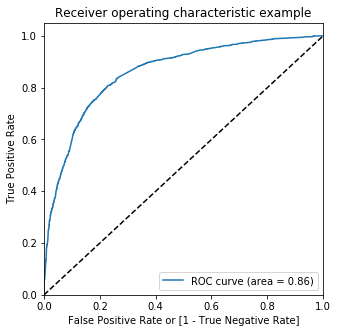

In [100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### We will look at what would be the optimal cut-off Threshold to be able to get the solution we seek. For the purpose, we will firstly create the Statistics with multiple differnt thresholds. then based on the different values , we will plot a chart and find the Threshold

##### Finding Optimal Cutoff Point

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.tail()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6444,0,0.058422,642012,0,1,0,0,0,0,0,0,0,0,0
6445,0,0.280038,655281,0,1,1,1,0,0,0,0,0,0,0
6446,1,0.863725,635947,1,1,1,1,1,1,1,1,1,1,0
6447,0,0.753027,597142,1,1,1,1,1,1,1,1,1,0,0
6448,0,0.467645,618387,0,1,1,1,1,1,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
# We will Calculate the metrics and store the results in a list

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385486  1.000000  0.000000
0.1   0.1  0.552024  0.972647  0.288166
0.2   0.2  0.708637  0.907482  0.583901
0.3   0.3  0.776710  0.833870  0.740853
0.4   0.4  0.794697  0.746983  0.824628
0.5   0.5  0.793922  0.664119  0.875347
0.6   0.6  0.770352  0.541432  0.913954
0.7   0.7  0.754225  0.453741  0.942720
0.8   0.8  0.726004  0.338697  0.968963
0.9   0.9  0.679640  0.183025  0.991168


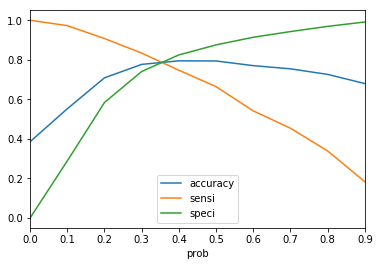

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Looking at hte chart, we pick the point where all the metrics intersect. The value between 0.35-4 seems to be a where the lines intersect. We can also validate this from the values which we have above. Since we are looking for all three values to be high enough - we identify the same space for our Threshold.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.280038,580457,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.332951,632611,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.946898,612731,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.729226,584456,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.848678,581789,1,1,1,1,1,1,1,1,1,1,0,1


In [105]:

conversion_rate = (sum(y_train_pred_final['final_predicted'])/sum(y_train_pred_final['Converted']))*100
conversion_rate

107.6427996781979

### # Calculating the Conversion Rate - We are using the Converted and final_predicted columns to compare. This can also be seen as a ratio of actual Converted to Final Prediction. This helps us understand how well we predicted. Since we have the value slightly more than 100 that means we successfully identified all the 1's and a few 0's were marked as 1's . The number of FP's is only 7% here and can be made even better if we work on increasing the specificity.

#### Using the Sensitivity - Specificity Metrics for Evaluation of the Model. Have picked up an updated Cut-off value of 0.38. 

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790975345014731

In [107]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3194,  769],
       [ 579, 1907]], dtype=int64)

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)

TP =  1907
TN =  3194
FP =  769
FN =  579


In [110]:
# Checking Accuracy
(TN+TP) /float(TP+TN+FP+FN)

0.790975345014731

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7670957361222848

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8059550845319202

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# Positive predictive value 
print ("Positive predictive value",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value",TN / float(TN+ FN))

0.19404491546807973
Positive predictive value 0.7126307922272048
Negative predictive value 0.8465412138881526


### We observe here that when we did the initial calculation of the model using 0.5 Threshold, we were getting only 66% Sensitivity. But upon looking at the cut-off Threshold, when we recalcualte , we observe that the required Threshold should be 0.35 so as to get an approx 80% os Sensitivity, Specificity as well as Accuracy.

### For us a balance between Specificity and Sensitivity is very important, as the CEO does not want his/her employee to be making too many cold calls.

## For the Test we will be using 0.38 as the Threshold

#### Using the second method of Evaluation i.e. Precision and Recall

##### Precision and Recall

In [114]:
#GEtting the confusion Metrics for evaluation purpose
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3469,  494],
       [ 835, 1651]], dtype=int64)

In [115]:
#Saving values in the variables
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
#Calcuating Precision
TP / (TP + FP)

0.7696969696969697

In [117]:
#Calculating Recall
TP / (TP + FN)

0.6641190667739341

In [118]:
from sklearn.metrics import precision_score, recall_score

In [119]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7696969696969697

In [120]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6641190667739341

### Precision and Recall TradeOff

In [121]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       1
 4       1
 5       1
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      1
 13      0
 14      1
 15      1
 16      1
 17      1
 18      0
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      1
 26      1
 27      1
 28      1
 29      0
        ..
 6419    0
 6420    0
 6421    1
 6422    0
 6423    0
 6424    0
 6425    1
 6426    0
 6427    0
 6428    0
 6429    1
 6430    0
 6431    0
 6432    0
 6433    1
 6434    0
 6435    0
 6436    0
 6437    1
 6438    0
 6439    0
 6440    0
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    1
 6447    0
 6448    0
 Name: Converted, Length: 6449, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
 5       1
 6       0
 7       0
 8       1
 9       0
 10      0
 11      0
 12      0
 13      0
 14      1
 15      1
 16      1
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      0
 24      0
 25      

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

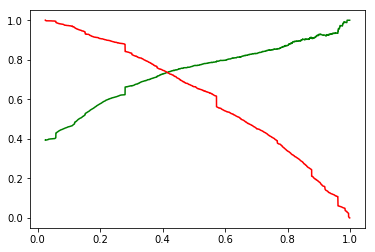

In [123]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### From the graph plotted above, we can see that the Threshold from this is also between similar range of 3.5 to  0.4  - very similar to the sensitivity and specificity model  . Looking at the figures, we decide to go with the Value from the
## Sensitivity and Specificity model i.e. 0.38

## Making Predictions on the Test Data

In [124]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper Article,X Education Forums,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
631665,7.0,52,7.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642855,6.0,361,6.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588170,6.0,721,1.5,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
609296,2.0,195,2.0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
603248,4.0,352,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [125]:

X_test[var_toStandardize] = scaler.transform(X_test[var_toStandardize])

In [126]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
Lead Number,,,,,,,,,,
631665,-0.795377,0,0,0,0,0,0,0,0,0
642855,-0.229508,0,0,0,0,0,0,0,0,0
588170,0.429757,0,0,0,0,1,0,0,1,0
609296,-0.533502,0,0,0,1,0,0,0,1,0
603248,-0.245990,0,0,0,0,0,0,0,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)

#### Making Predictions on the Test Case

In [128]:
y_test_pred = res.predict(X_test_sm)

In [129]:
y_test_pred[:10]

Lead Number
631665    0.122516
642855    0.209445
588170    0.081841
609296    0.016852
603248    0.206372
653858    0.121406
616664    0.305045
580530    0.012379
601726    0.132187
656381    0.671193
dtype: float64

In [130]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [131]:

y_pred_1.head()

,0
Lead Number,
631665,0.122516
642855,0.209445
588170,0.081841
609296,0.016852
603248,0.206372


In [132]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [133]:
# Putting the ID to index
y_test_df['Lead Number'] = y_test_df.index

In [134]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,631665,0.122516
1,0,642855,0.209445
2,1,588170,0.081841
3,0,609296,0.016852
4,0,603248,0.206372


In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [138]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [139]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,631665,0,0.122516
1,642855,0,0.209445
2,588170,1,0.081841
3,609296,0,0.016852
4,603248,0,0.206372


In [140]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
Odd_Y_Train_final = y_pred_final
y_pred_final.tail()

,Lead Number,Converted,Conversion_Prob,final_predicted
2760,615278,0,0.152228,0
2761,627877,1,0.911297,1
2762,624114,1,0.781148,1
2763,644006,0,0.057153,0
2764,582385,0,0.129593,0


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7945750452079566

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1367,  330],
       [ 238,  830]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)

TP =  830
TN =  1367
FP =  330
FN =  238


In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7771535580524345

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.8055391868002357

In [147]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385486  1.000000  0.000000
0.1   0.1  0.552024  0.972647  0.288166
0.2   0.2  0.708637  0.907482  0.583901
0.3   0.3  0.776710  0.833870  0.740853
0.4   0.4  0.794697  0.746983  0.824628
0.5   0.5  0.793922  0.664119  0.875347
0.6   0.6  0.770352  0.541432  0.913954
0.7   0.7  0.754225  0.453741  0.942720
0.8   0.8  0.726004  0.338697  0.968963
0.9   0.9  0.679640  0.183025  0.991168


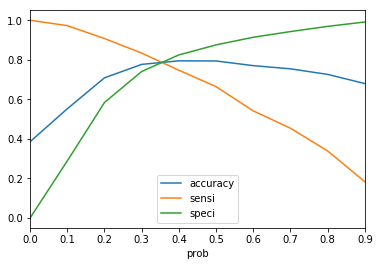

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

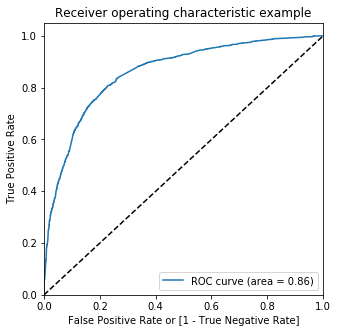

In [149]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [150]:

conversion_rate = (sum(y_pred_final['final_predicted'])/sum(y_pred_final['Converted']))*100
conversion_rate

108.61423220973782

#### This means that we were able to mark all the 1's and also marked some extra 0's . Its a good model and can be made better by better recognizing the 0's. that is if we increase the specificity then it can become even better.

### Hot Leads Calculation - 
#### We also want to be able get the HOT Leads. Hot Leads would be those customers which have a high probability of getting converted. so if we run a simple filter to pick the hgih probability customers only - that should work

In [151]:
import scipy.stats as stats

temp =X_train_sm
temp.drop(columns='const',inplace=True)

final_col_list = list(temp.columns)
final_col_list = final_col_list + ['Lead Number']
check_df = Lead_df[final_col_list]
check_df.index = check_df['Lead Number']


# Calculating the Odds and the OddLog for the final Train
Odd_Y_Train_final['Odds'] = Odd_Y_Train_final['Conversion_Prob'].apply(lambda x: x/float(1-x))
Odd_Y_Train_final['LogOdds'] = Odd_Y_Train_final['Odds'].apply(lambda x: np.log(x))
Odd_Y_Train_final.index = Odd_Y_Train_final['Lead Number']

#Calculating the odds and logodds for comparing with variables 
Odd_Y_Train_final.sort_values(['Odds']).tail()

,Lead Number,Converted,Conversion_Prob,final_predicted,Odds,LogOdds
Lead Number,,,,,,
635776,635776,1,0.997529,1,403.685319,6.000636
593208,593208,1,0.997770,1,447.464845,6.103598
643467,643467,1,0.998106,1,527.084830,6.267362
598991,598991,1,0.998272,1,577.567432,6.358825
594038,594038,1,0.999567,1,2308.756695,7.744464


In [152]:
# Hot Leads would be the customers with a high Odd ratio or High Probability. Here we have used 0.8 i.e. 
#80% probability of conversion of the customers and have labelled them as Hot Leads
# WE can also use Odds and LogODds for plotting along with the variables to see the influence of probability 
#and variables
Odd_Y_Train_final.loc[Odd_Y_Train_final['Conversion_Prob']>0.8].head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Odds,LogOdds
Lead Number,,,,,,
634728,634728,1,0.877936,1,7.192423,1.973028
602406,602406,1,0.918864,1,11.324918,2.427005
617745,617745,1,0.900715,1,9.072058,2.205199
592598,592598,1,0.916832,1,11.023805,2.400057
621205,621205,1,0.919007,1,11.346762,2.428932


## Approach for this Model

#### Model Building

11. For the Model building firstly scaled the data. Used Standard Scaler to be able to scale the data. We scale the continuous variables.
12. We then divide the data into Train and Test. 
13. We move ahead using RFE method. We pick the top 15 variables which upon calculations we see give us an accuracy of 80%
14. We then look at the P-Value and the VIF for all the variables remaining. 
15. Any variable with a P-Value higher than 0.05 is dropped one at a time and re-evaluation of P-Value is done along with the VIF.
16. Once we have all low P-Values, we check the VIF's for Multi-colinearity. All variables with VIF more than 5 are dropped one at a time. And each time the re-evaluation of P-Value and VIF is done.
17. we stop when we have the P-Values as well as the VIF's in the permitted range 
18. In the end of RFE model implementation we are left with the below variables and their Coefficients and P-Values

                                                                coef	std err	z	P>|z|	[0.025	0.975]
                                                    const	-1.0685	0.053	-20.220	0.000	-1.172	-0.965
                                Total Time Spent on Website	1.1320	0.038	29.794	0.000	1.057	1.206
                                    Lead Source_Olark Chat	1.1323	0.097	11.646	0.000	0.942	1.323
                                    Lead Source_Reference	4.0419	0.203	19.935	0.000	3.644	4.439
                            Lead Source_Welingak Website	6.1757	1.012	6.104	0.000	4.193	8.159
                                Last Activity_Email Bounced	-1.6209	0.312	-5.190	0.000	-2.233	-1.009
                    Last Activity_Olark Chat Conversation	-1.0626	0.161	-6.594	0.000	-1.378	-0.747
                                    Last Activity_SMS Sent	1.2366	0.070	17.614	0.000	1.099	1.374
            Last Notable Activity_Had a Phone Conversation	2.9315	1.105	2.654	0.008	0.766	5.097
                            Last Notable Activity_Modified	-0.7730	0.076	-10.231	0.000	-0.921	-0.625
                        Last Notable Activity_Unreachable	1.6597	0.535	3.101	0.002	0.611	2.709

                

19. Variables impacting the most are: as seen from the above list:
    a. Lead Source_Welingak Website - this has the highest coeff            = 6.1757
    b. Lead Source_Reference = second high coeff                            = 4.0419
    c. Last Notable Activity_Had a Phone Conversation                       = 2.9315
    d. Last Notable Activity_Unreachable                                    = 1.6597
    e. Last Activity_Email Bounced (this negatively impacts the decision)   = -1.6209
    
20. We then proceed forward to check the ROC and the accuracy of the result using the confusion matrix

 ROC - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

